# Iris Data Classification

In [2]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import Ridge;
from sklearn.linear_model    import Lasso;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.neural_network  import MLPClassifier;

from sklearn.pipeline import Pipeline;

########################
### Import Data Sets ###
########################

from sklearn                 import datasets;

In [3]:
iris = datasets.load_iris();

# Check Head of Data
print(iris.DESCR)

# Convert to Pandas
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], 'target'))

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


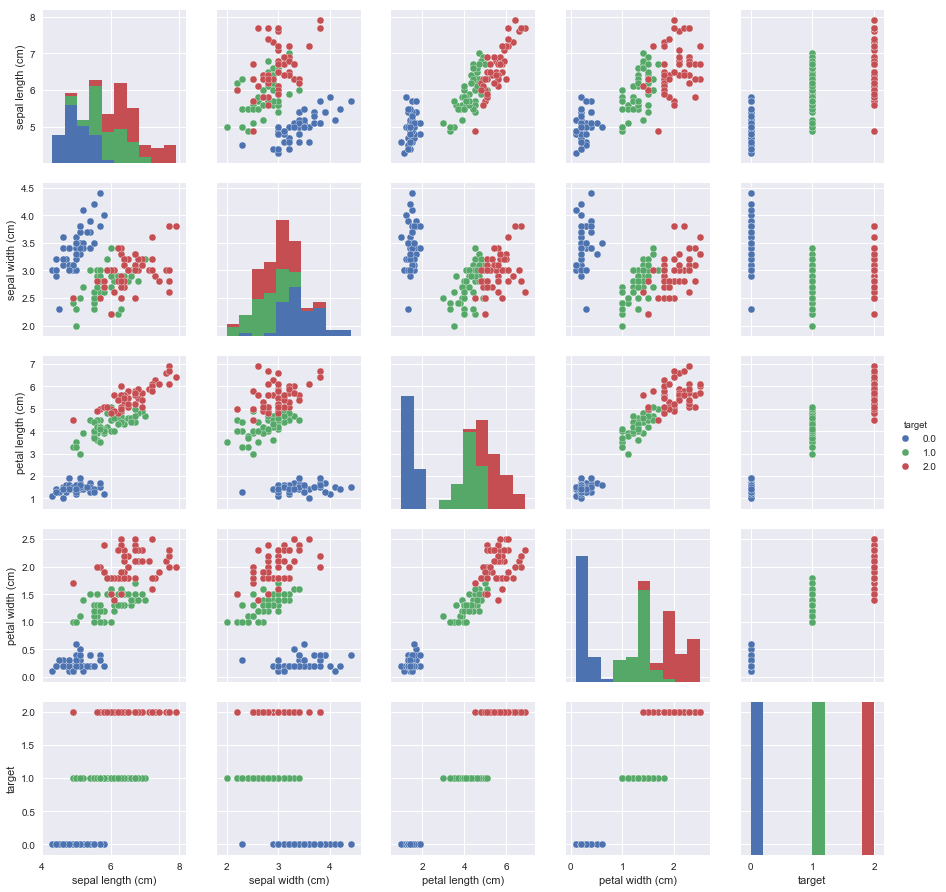

In [12]:
sns.pairplot(data=df, hue='target')

# Scale and Train,Test,Split

In [4]:
# Scale features to mean = 1, std = 1

scaler = StandardScaler();

scaler.fit(df.drop('target', axis=1));

scaled_df = scaler.transform(df.drop('target', axis=1));

df_feat = pd.DataFrame(scaled_df, columns=df.columns[:-1])
df_feat.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['target'], test_size=0.5);

# K Nearest Neighbors

In [12]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 24  0]
 [ 0  4 22]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.86      1.00      0.92        24
        2.0       1.00      0.85      0.92        26

avg / total       0.95      0.95      0.95        75



Cross Validation Scores
Accuracy: 0.95 (+/- 0.10)


In [18]:
param_grid = [{'n_neighbors': np.arange(1, 10),
               'weights':     ['uniform', 'distance'],
               'algorithm':   ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size':   np.arange(10, 100, 10)
              }]

grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.973333333333


Best Estimator


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

# Decision Tree

In [11]:
dtree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

dtree.fit(X_train, y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(dtree, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 23  1]
 [ 0  5 21]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.82      0.96      0.88        24
        2.0       0.95      0.81      0.88        26

avg / total       0.93      0.92      0.92        75



Cross Validation Scores
Accuracy: 0.94 (+/- 0.11)


In [21]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'splitter':  ['best', 'random'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(dtree, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.973333333333


Best Parameters
Best Estimator


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Random Forest

In [10]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rfc.fit(X_train,y_train);

pred = rfc.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(rfc, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 22  2]
 [ 0  5 21]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.81      0.92      0.86        24
        2.0       0.91      0.81      0.86        26

avg / total       0.91      0.91      0.91        75



Cross Validation Scores
Accuracy: 0.95 (+/- 0.09)


In [24]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(rfc, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.96


Best Parameters
Best Estimator


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Support Vector Machine

In [8]:
svc_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(svc_model, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 22  2]
 [ 0  4 22]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.85      0.92      0.88        24
        2.0       0.92      0.85      0.88        26

avg / total       0.92      0.92      0.92        75



Cross Validation Scores
Accuracy: 0.97 (+/- 0.11)


In [27]:
param_grid = [{'C': np.arange(1, 3, 1),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'degree': [2, 3, 4, 5]
              }]

grid = GridSearchCV(svc_model, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.986666666667


Best Parameters
Best Estimator


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=3);

kmeans.fit(wine.drop('class', axis=1));

# Linear Discriminant Analysis

In [6]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

pred = lda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(lda, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 22  2]
 [ 0  1 25]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.96      0.92      0.94        24
        2.0       0.93      0.96      0.94        26

avg / total       0.96      0.96      0.96        75



Cross Validation Scores
Accuracy: 0.98 (+/- 0.09)


# Quadratic Discriminant Analysis

In [7]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

pred = qda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(qda, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[25  0  0]
 [ 0 23  1]
 [ 0  1 25]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        25
        1.0       0.96      0.96      0.96        24
        2.0       0.96      0.96      0.96        26

avg / total       0.97      0.97      0.97        75



Cross Validation Scores
Accuracy: 0.98 (+/- 0.09)


# Principle Component Analysis

(178, 13)
(178, 2)


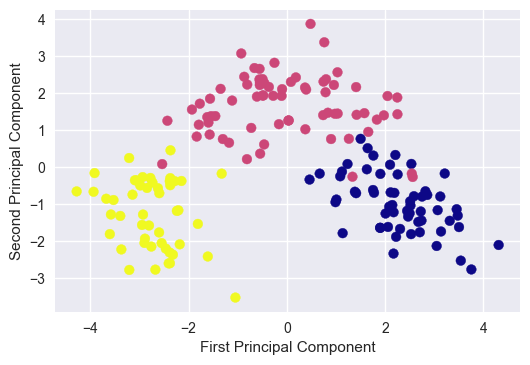

In [36]:
pca = PCA(n_components=2);

pca.fit(scaled_wine);

x_pca = pca.transform(scaled_wine);

print(scaled_wine.shape);
print(x_pca.shape);

fig  = plt.figure(figsize=(6, 4), dpi=100);

axes1 = fig.add_subplot(111); 

axes1.scatter(x_pca[:,0], x_pca[:,1], c=wine['class'], cmap='plasma')
axes1.set_xlabel('First Principal Component')
axes1.set_ylabel('Second Principal Component')

In [37]:
wine.drop('class', axis=1).columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'phenols', 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'OD', 'proline'],
      dtype='object')

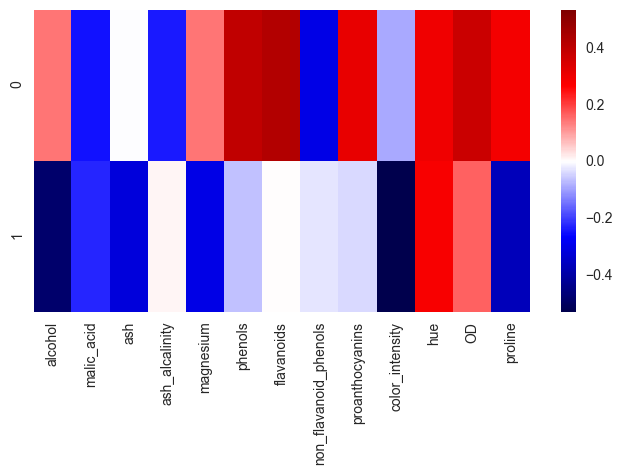

In [40]:
df_comp = pd.DataFrame(pca.components_, columns=['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline'])

fig  = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(df_comp, cmap='seismic', ax=axes1)

In [32]:
df = pd.DataFrame(data=np.array([x_pca[:,0],x_pca[:,1]]).transpose())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, wine['class'], test_size=0.75);

NameError: name 'df' is not defined

In [34]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[35  1  0]
 [ 4 33  1]
 [ 0  0 15]]


Classification Report
             precision    recall  f1-score   support

          1       0.90      0.97      0.93        36
          2       0.97      0.87      0.92        38
          3       0.94      1.00      0.97        15

avg / total       0.94      0.93      0.93        89



Cross Validation Scores
Accuracy: 0.94 (+/- 0.11)


# Multi-Layer Perceptron

In [45]:
clf = MLPClassifier(activation='identity', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf.fit(X_train,y_train);

pred = clf.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(clf, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[26  0  0]
 [ 0 21  3]
 [ 0  2 23]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        26
        1.0       0.91      0.88      0.89        24
        2.0       0.88      0.92      0.90        25

avg / total       0.93      0.93      0.93        75



Cross Validation Scores
Accuracy: 0.98 (+/- 0.09)


In [46]:
param_grid = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
               'learning_rate': ['constant', 'invscaling', 'adaptive'],
               'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'hidden_layer_sizes': [(10,), (50,), (100,), (200,), (300,)]
              }]

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Score')
#print(grid.cv_results_['mean_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_
print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.986666666667


Best Parameters


Best Estimator


MLPClassifier(activation='identity', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)